<a href="https://colab.research.google.com/github/tomdv18/FemebalScrapper/blob/main/FemebalScrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
##!pip install requests

In [62]:
##!pip install pandas

In [63]:
##!pip install beautifulsoup4

In [64]:
##!pip install selenium

In [65]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import numpy as np

Datos APERTURA 2023

In [66]:
lista_idUrls = ['64782','64786','64797','64803','64812','64820','64827','64837','64842','64854','64857','64871','64872','64887','64889'] ##TORNEO APERTURA 2023
fechas = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"] ## Puede cambiarse el numero por el nombre del rival

Datos CLAUSURA 2023

In [67]:
##lista_idUrls = ['85980','85984','85995','86001','86010','86018','86025','86035','86040','86052','86055','86069','86070','86085','86087'] ##TORNEO APERTURA 2023
##fechas = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"] ## Puede cambiarse el numero por el nombre del rival

In [68]:
#Seteo de variables:
equipo_estadisticas = "Muñiz"

In [69]:

url_planilla = "https://www.femebal.com/admin/ax/get-planilla.php"
dataframes = []
i = 0
for id in lista_idUrls:

# Datos a enviar en la solicitud POST
  data_planilla = {'id': id, 'v': '1'}

  response_planilla = requests.post(url_planilla, data=data_planilla)

  #Status de la request
  if response_planilla.status_code != 200:
      print("Error al obtener la información de la planilla. Código de estado:", response_planilla.status_code)

  else:
      data_json = response_planilla.json()
      tabla_incidencias = data_json['ei']
      soup = BeautifulSoup(tabla_incidencias, 'html.parser')
      lista = []

      filas_incidencias = soup.find_all('tr', class_='incidencias-equipo-1') + soup.find_all('tr', class_='incidencias-equipo-2')

      # Extraigo la informacion
      for fila in filas_incidencias:
        equipo = fila.find('td', class_='text-bold').text.strip()
        if (equipo == equipo_estadisticas):
            tipo_incidencia = fila.find('td').find_next_sibling().text.strip()
            dorsal = fila.find_all('td')[3].text.strip()
            jugador = fila.find_all('td')[5].text.strip()

            lista.append((tipo_incidencia, equipo, dorsal,jugador))

      dataframes.append(pd.DataFrame(lista,columns=["Tipo","Equipo","Dorsal","Jugador"]))
      i = i + 1

##Imprimo un df
dataframes[4]

,Tipo,Equipo,Dorsal,Jugador
0,Gol,Muñiz,16,"PEREZ, DYLAN LEONEL"
1,2 min,Muñiz,20,"MARASCA, MARCELO"
2,Gol,Muñiz,20,"MARASCA, MARCELO"
3,2 min,Muñiz,28,"VENTRICE, BRUNO"
4,Gol,Muñiz,13,"FIUMARA, MAXIMO FEDERICO"
5,Gol,Muñiz,16,"PEREZ, DYLAN LEONEL"
6,Gol,Muñiz,21,"BRAGAGNOLO, RAMIRO"
7,Gol,Muñiz,76,"BELTRAMINO MARTINEZ, IGNACIO"
8,Gol,Muñiz,28,"VENTRICE, BRUNO"
9,Gol,Muñiz,21,"BRAGAGNOLO, RAMIRO"


In [70]:
df_goals = []
j = 0
for df in dataframes:
  df_goles = df[df['Tipo']=='Gol']
  df_goles = df_goles[['Tipo','Jugador']]
  df_goles = df_goles.rename(columns={'Tipo':fechas[j]})
  df_goals.append(df_goles.groupby("Jugador").count())
  j = j +1

df_goals[7]

,8
Jugador,
"BARREIRO, MARCOS NICOLAS",5
"BRAGAGNOLO, RAMIRO",7
"GALIANO, IGNACIO",2
"GOMEZ, FRANCISCO EZEQU",1
"INOFRE, FACUNDO JOEL",3
"MARASCA, MARCELO",2
"PEREZ, DYLAN LEONEL",2
"RUDEL, ULISES",1
"VENTRICE, BRUNO",3


In [71]:
df_goles1 = df[df['Tipo']=='Gol']
df_goles1 = df_goles1[['Tipo','Jugador']]
df_goles1 = df_goles1.groupby("Jugador").count()


In [72]:
nuevodf = pd.concat(df_goals, axis =1)
nuevodf = nuevodf.fillna(0).astype(int)
df = nuevodf
nuevodf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Jugador,,,,,,,,,,,,,,,
"AYOROA, LAUTARO NICOLAS EDUARDO",1,0,2,0,0,0,0,0,0,0,2,0,1,0,0
"BRAGAGNOLO, RAMIRO",3,0,7,0,3,5,3,7,1,2,4,0,4,6,0
"FIUMARA, MAXIMO FEDERICO",6,4,3,2,4,4,6,0,5,1,2,8,8,7,7
"INOFRE, FACUNDO JOEL",5,4,2,0,2,2,1,3,5,2,2,3,0,7,1
"MARASCA, MARCELO",4,3,4,0,2,7,2,2,5,2,5,4,7,4,4
"NESELIS, FACUNDO AGUSTIN",1,2,1,0,0,3,0,0,3,0,0,5,0,0,0
"PEREZ, DYLAN LEONEL",2,0,0,2,2,1,1,2,4,3,0,0,1,2,2
"UFOR, RODRIGO",2,0,0,4,0,1,3,0,0,1,0,1,1,2,1
"VENTRICE, BRUNO",12,5,7,6,4,6,7,3,5,4,6,4,9,5,4


In [73]:
df["Total"] = df[fechas].sum(axis=1)
df["Media"] = df[fechas].mean(axis=1)


In [74]:
df = df.reset_index().rename(columns={"index":"Jugador"} )
df

,Jugador,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Total,Media
0,"AYOROA, LAUTARO NICOLAS EDUARDO",1,0,2,0,0,0,0,0,0,0,2,0,1,0,0,6,0.400000
1,"BRAGAGNOLO, RAMIRO",3,0,7,0,3,5,3,7,1,2,4,0,4,6,0,45,3.000000
2,"FIUMARA, MAXIMO FEDERICO",6,4,3,2,4,4,6,0,5,1,2,8,8,7,7,67,4.466667
3,"INOFRE, FACUNDO JOEL",5,4,2,0,2,2,1,3,5,2,2,3,0,7,1,39,2.600000
4,"MARASCA, MARCELO",4,3,4,0,2,7,2,2,5,2,5,4,7,4,4,55,3.666667
5,"NESELIS, FACUNDO AGUSTIN",1,2,1,0,0,3,0,0,3,0,0,5,0,0,0,15,1.000000
6,"PEREZ, DYLAN LEONEL",2,0,0,2,2,1,1,2,4,3,0,0,1,2,2,22,1.466667
7,"UFOR, RODRIGO",2,0,0,4,0,1,3,0,0,1,0,1,1,2,1,16,1.066667
8,"VENTRICE, BRUNO",12,5,7,6,4,6,7,3,5,4,6,4,9,5,4,87,5.800000
9,"BARREIRO, MARCOS NICOLAS",0,3,0,0,0,0,0,5,1,0,0,0,1,0,0,10,0.666667


<ipython-input-75-0cd677aa633d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goleadores, x=x_labels, y="Total", palette=['#003049', '#28502E', '#8d0801'])


([<matplotlib.axis.YTick at 0x7fe827dac640>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80')])

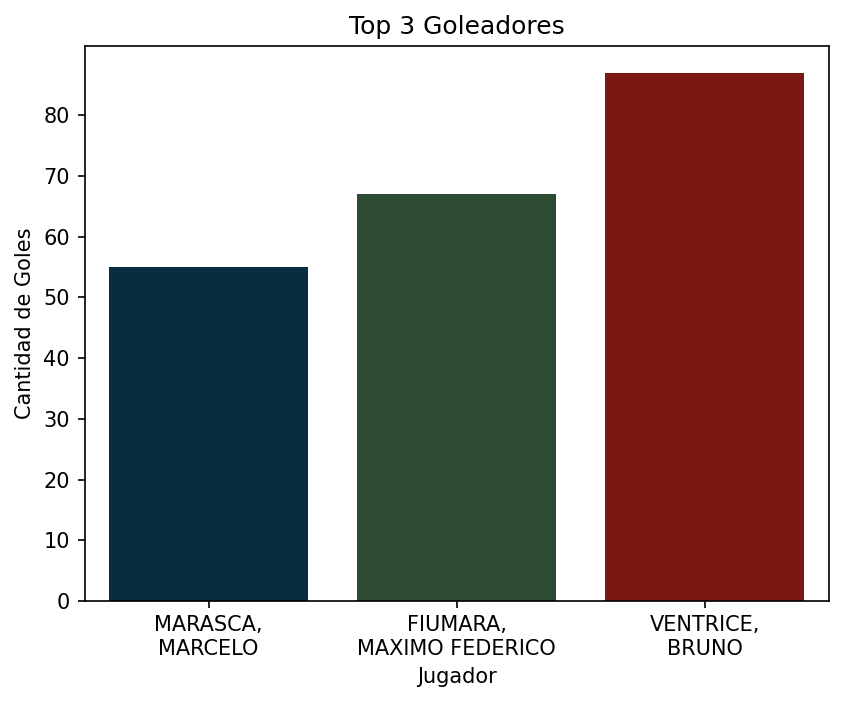

In [75]:
##goleadores = df.sort_values("Total",ascending=False).head(3) ##DEBERIA SER ASI PERO PARA QUE QUEDE MEJOR LA VISU VOLTEO EL DF
goleadores = df.sort_values("Total",ascending=True).tail(3)

plt.figure(dpi = 150)
x_labels = [text.split(' ', 1)[0] + "\n" +text.split(' ', 1)[1]  for text in goleadores.Jugador]
plt.title("Top 3 Goleadores")
sns.barplot(data=goleadores, x=x_labels, y="Total", palette=['#003049', '#28502E', '#8d0801'])
plt.ylabel('Cantidad de Goles')
plt.xlabel("Jugador")
plt.yticks(np.arange(0, 90, step=10))

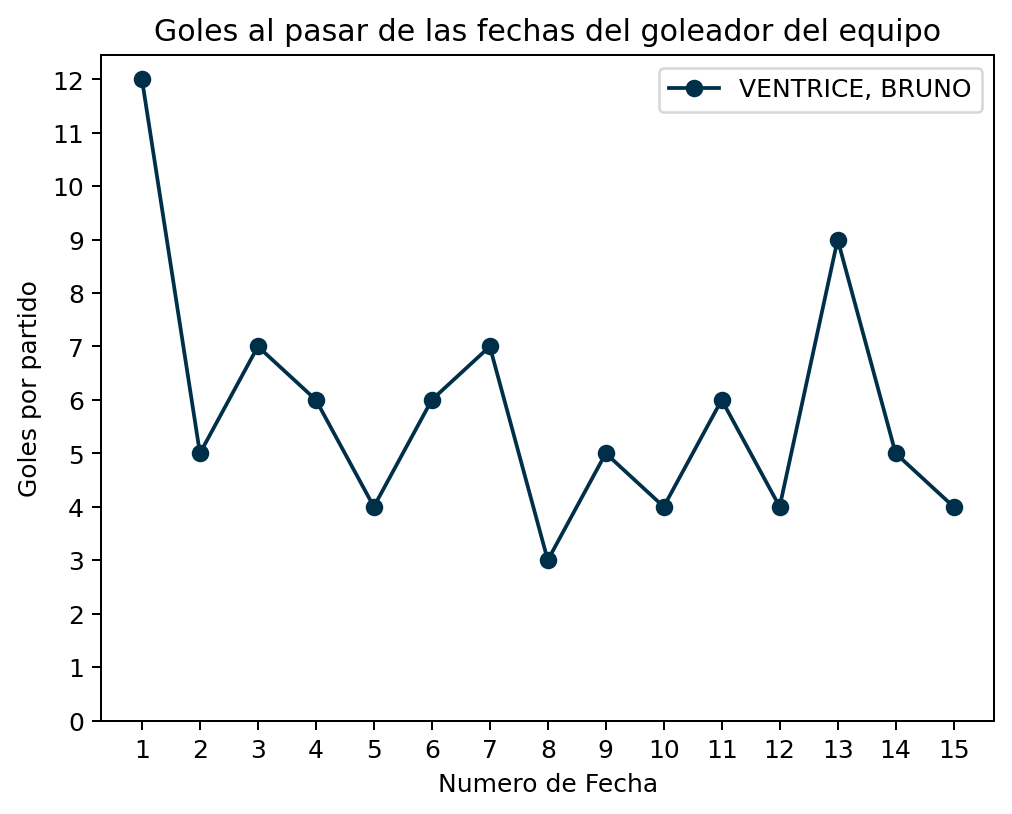

In [76]:
cantidad_jugadores = 1 ##Es posible poner todos los jugadores que se desee, con uno el grafico queda mas prolijo
goleo = df.sort_values("Total",ascending=False).head(cantidad_jugadores)
fechas2= ["Jugador"] + fechas
goleo = goleo[fechas2]


goleo
goleo.set_index('Jugador', inplace=True)

# Transponer el DataFrame para que las columnas sean las fechas y las filas los jugadores
goleo = goleo.transpose()
palette=['#003049', '#28502E', '#8d0801', "#44A1A0","#E56399"] ##En caso de poner mas de 5 jugadores hay que agregar mas colores a la paleta. O simplemente comentarla y usar los colores default

plt.figure(dpi=180)
i = 0
for jugador in goleo.columns:
    plt.plot(goleo.index, goleo[jugador], marker='o',  color=palette[i], label=jugador)
    i = i +1


plt.title('Goles al pasar de las fechas del goleador del equipo')
plt.xlabel('Numero de Fecha')
plt.ylabel('Goles por partido')
plt.xticks(goleo.index)
plt.yticks(np.arange(0, 13, step=1))
plt.legend()

plt.show()

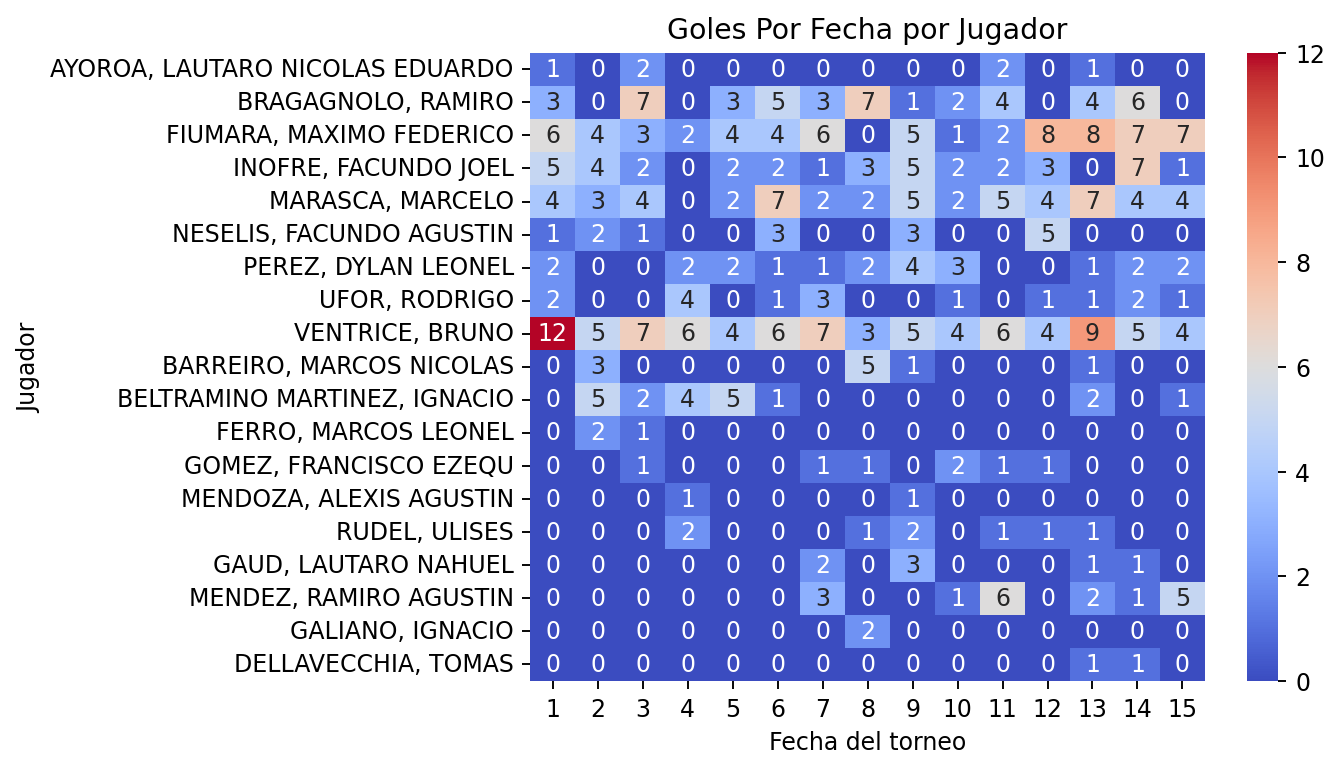

In [77]:

fechas2= ["Jugador"] + fechas
fechas2
df_heat = df[fechas2]
df_heat.set_index("Jugador",inplace=True)


plt.figure(dpi=170)
sns.heatmap(df_heat, annot=True, cmap="coolwarm",fmt='g')
plt.title('Goles Por Fecha por Jugador')
plt.xlabel('Fecha del torneo')
plt.ylabel('Jugador')

plt.show()

Hago analisis agregandole informacion por fuera de la pagina


In [78]:
jugadores = nuevodf.index
print(jugadores)

Index(['AYOROA, LAUTARO NICOLAS EDUARDO', 'BRAGAGNOLO, RAMIRO',
       'FIUMARA, MAXIMO FEDERICO', 'INOFRE, FACUNDO JOEL', 'MARASCA, MARCELO',
       'NESELIS, FACUNDO AGUSTIN', 'PEREZ, DYLAN LEONEL', 'UFOR, RODRIGO',
       'VENTRICE, BRUNO', 'BARREIRO, MARCOS NICOLAS',
       'BELTRAMINO MARTINEZ, IGNACIO', 'FERRO, MARCOS LEONEL',
       'GOMEZ, FRANCISCO EZEQU', 'MENDOZA, ALEXIS AGUSTIN', 'RUDEL, ULISES',
       'GAUD, LAUTARO NAHUEL', 'MENDEZ, RAMIRO AGUSTIN', 'GALIANO, IGNACIO',
       'DELLAVECCHIA, TOMAS'],
      dtype='object', name='Jugador')


In [79]:
##Le asigno una posicion a cada jugador para poder hacer el analisis por posicion

posiciones = {'AYOROA, LAUTARO NICOLAS EDUARDO':"LATERAL", 'BRAGAGNOLO, RAMIRO':"EXTREMO", 'CARDINALE, BRUNO':"LATERAL", 'CUEVAS, MATIAS IVAN ALEJANDRO':"PIVOT",
       'FIUMARA, MAXIMO FEDERICO':"LATERAL", 'INOFRE, FACUNDO JOEL':"EXTREMO", 'MARASCA, MARCELO':"LATERAL",
       'NESELIS, FACUNDO AGUSTIN':"EXTREMO", 'PEREZ, DYLAN LEONEL':"LATERAL", 'UFOR, RODRIGO':"PIVOT",
       'VENTRICE, BRUNO':"CENTRAL", 'BARREIRO, MARCOS NICOLAS':"CENTRAL",
       'BELTRAMINO MARTINEZ, IGNACIO':"EXTREMO", 'FERRO, MARCOS LEONEL':"PIVOT",
       'GOMEZ, FRANCISCO EZEQU':"PIVOT", 'MENDOZA, ALEXIS AGUSTIN':"CENTRAL", 'RUDEL, ULISES':"LATERAL",
       'GAUD, LAUTARO NAHUEL':"EXTREMO", 'MENDEZ, RAMIRO AGUSTIN':"EXTREMO", 'GALIANO, IGNACIO':"CENTRAL",
       'DELLAVECCHIA, TOMAS':"ARQUERO", 'LOPEZ, JOAQUIN IGNACIO':"EXTREMO"}

df_to_add = pd.DataFrame(posiciones, index=[0])

df_to_add = df_to_add.transpose()
df_to_add = df_to_add.rename(columns={0:"Posicion"})

# Concatenar el DataFrame con el DataFrame original
df = pd.concat([nuevodf, df_to_add], ignore_index=False, axis = 1).reset_index().rename(columns={"index":"Jugador"}).fillna(0)
df[fechas]= df[fechas].astype(int)
df

,Jugador,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Total,Media,Posicion
0,"AYOROA, LAUTARO NICOLAS EDUARDO",1,0,2,0,0,0,0,0,0,0,2,0,1,0,0,6.0,0.400000,LATERAL
1,"BRAGAGNOLO, RAMIRO",3,0,7,0,3,5,3,7,1,2,4,0,4,6,0,45.0,3.000000,EXTREMO
2,"FIUMARA, MAXIMO FEDERICO",6,4,3,2,4,4,6,0,5,1,2,8,8,7,7,67.0,4.466667,LATERAL
3,"INOFRE, FACUNDO JOEL",5,4,2,0,2,2,1,3,5,2,2,3,0,7,1,39.0,2.600000,EXTREMO
4,"MARASCA, MARCELO",4,3,4,0,2,7,2,2,5,2,5,4,7,4,4,55.0,3.666667,LATERAL
5,"NESELIS, FACUNDO AGUSTIN",1,2,1,0,0,3,0,0,3,0,0,5,0,0,0,15.0,1.000000,EXTREMO
6,"PEREZ, DYLAN LEONEL",2,0,0,2,2,1,1,2,4,3,0,0,1,2,2,22.0,1.466667,LATERAL
7,"UFOR, RODRIGO",2,0,0,4,0,1,3,0,0,1,0,1,1,2,1,16.0,1.066667,PIVOT
8,"VENTRICE, BRUNO",12,5,7,6,4,6,7,3,5,4,6,4,9,5,4,87.0,5.800000,CENTRAL
9,"BARREIRO, MARCOS NICOLAS",0,3,0,0,0,0,0,5,1,0,0,0,1,0,0,10.0,0.666667,CENTRAL


In [80]:
goles_por_posicion = df.groupby("Posicion")["Total"].sum().reset_index()

<ipython-input-81-7fd16a4adb8e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goles_por_posicion, x="Posicion", y="Total", palette=['#483d3f', '#058ed9', '#a39a92',


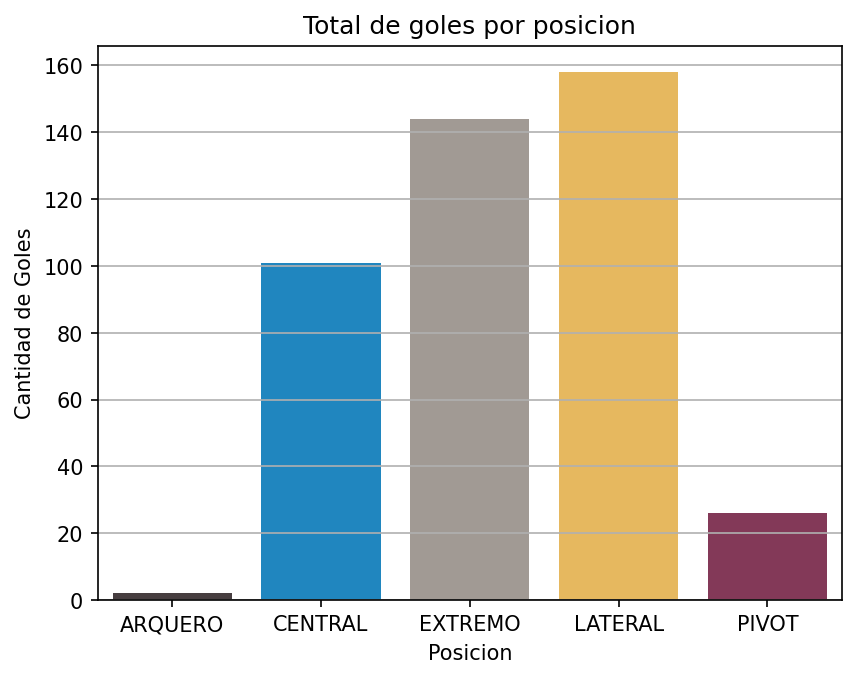

In [81]:

plt.figure(dpi = 150)

plt.title("Total de goles por posicion")
sns.barplot(data=goles_por_posicion, x="Posicion", y="Total", palette=['#483d3f', '#058ed9', '#a39a92',
                                                                          '#fcbf49', '#8f2d56'])
plt.ylabel('Cantidad de Goles')
plt.xlabel("Posicion")
ax = plt.gca()
ax.yaxis.grid(True)

In [82]:
indices_max_goles = df.groupby('Posicion')['Total'].idxmax()
goleadores_por_posicion = df.loc[indices_max_goles, ['Jugador','Posicion', 'Total','Media' ]]
goleadores_por_posicion["Concatenado"] = goleadores_por_posicion.Posicion.str.cat(" " + goleadores_por_posicion.Jugador)
goleadores_por_posicion

,Jugador,Posicion,Total,Media,Concatenado
18,"DELLAVECCHIA, TOMAS",ARQUERO,2.0,0.133333,"ARQUERO DELLAVECCHIA, TOMAS"
8,"VENTRICE, BRUNO",CENTRAL,87.0,5.800000,"CENTRAL VENTRICE, BRUNO"
1,"BRAGAGNOLO, RAMIRO",EXTREMO,45.0,3.000000,"EXTREMO BRAGAGNOLO, RAMIRO"
2,"FIUMARA, MAXIMO FEDERICO",LATERAL,67.0,4.466667,"LATERAL FIUMARA, MAXIMO FEDERICO"
7,"UFOR, RODRIGO",PIVOT,16.0,1.066667,"PIVOT UFOR, RODRIGO"


<ipython-input-83-430a49a6c1ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goleadores_por_posicion, x="Total", y=y_labels, palette=['#FF0001', '#2962FF', '#FF2D00',


Text(0, 0.5, 'Posicion')

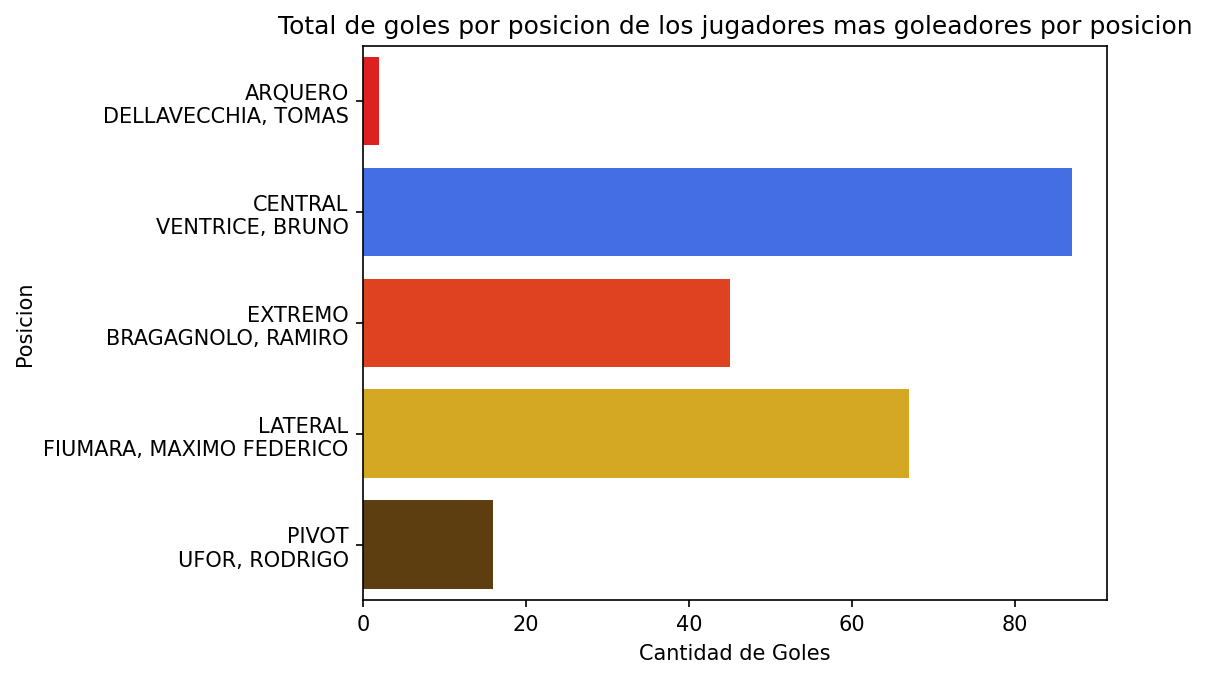

In [83]:

plt.figure(dpi = 150)

plt.title("Total de goles por posicion de los jugadores mas goleadores por posicion")
y_labels = [text.split(' ', 1)[0] + "\n" +text.split(' ', 1)[1]  for text in goleadores_por_posicion.Concatenado]
sns.barplot(data=goleadores_por_posicion, x="Total", y=y_labels, palette=['#FF0001', '#2962FF', '#FF2D00',
                                                                          '#F2B705', '#684005'])
plt.xlabel('Cantidad de Goles')
plt.ylabel("Posicion")

In [84]:
bars= df[fechas2 +["Posicion"] ]
bars = bars.groupby("Posicion")[fechas].sum()
bars = bars.transpose()
bars

Posicion,ARQUERO,CENTRAL,EXTREMO,LATERAL,PIVOT
1,0,12,9,13,2
2,0,8,11,7,2
3,0,7,12,9,2
4,0,7,4,6,4
5,0,4,10,8,0
6,0,6,11,12,1
7,0,7,9,9,4
8,0,10,10,5,1
9,0,7,12,16,0
10,0,4,5,6,3


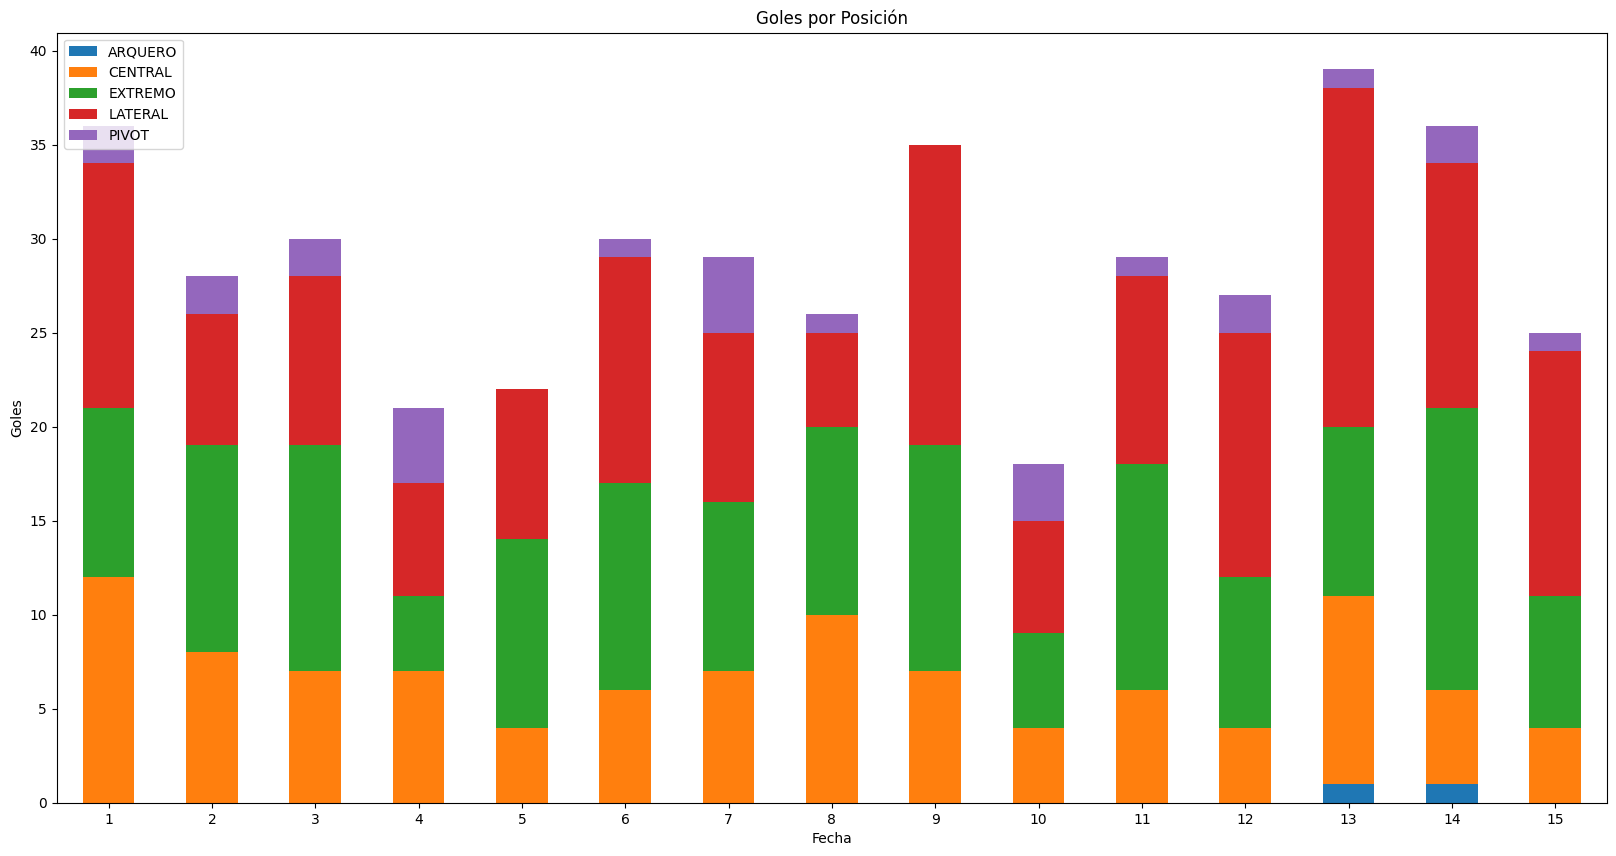

In [85]:
bars.plot(kind='bar', stacked=True,figsize=(20, 10))
plt.xlabel('Fecha')
plt.ylabel('Goles')
plt.title('Goles por Posición')
plt.legend(loc="upper left")
plt.xticks(rotation=0)
plt.show()